# 2. 지도학습

## 2.1 분류와 회귀
지도학습에는 분류(classfication)와 회귀(regreesion)가 있다.<BR>
분류는 여러 class label 중 하나를 예측하는 것이다.<BR>
딱 두개의 클래스로 분류하는 이진분류(binary classification)와 셋 이상의 클래스로 분류하는 다중분류(multiclass classification)으로 나뉜다.<BR>
<BR>
회귀는 연속적인 숫자, 실수를 예측하는 것이다.

## 2.2 일반화, 과대적합, 과소적합
예측모델이 처음 보는 데이터에 대해 정확하게 예측할 수 있으면 이를 훈련세트에서 테스트 세트로 **일반화(generalization)** 되었다고 한다. 그래서 모델을 만들 때는 가능한 한 정확하게 일반화되도록 해야 한다.)<br>
가진 정보를 모두 사용해서 너무 복잡한 모델을 만드는 것을 **과대적합(overfitting)** 이라고 한다. 과대적합은 모델이 훈련 세트의 각 샘플에 너무 가갑게 맞춰져서 새로운 데이터에 일반화되기 어려울 때 일어난다.<br>
간단한 모델은 다양한 정보를 반영하지 못할 수가 있는데 이것을 **과소적합(underfitting)** 이라고 한다.<br>

**우리가 찾으려는 모델은 일반화 성능이 최대가 되는 최적점에 있는 모델이다.**

### 2.2.1 모델 복잡도와 데이터셋 크기의 관계
모델의 복잡도는 훈련 데이터셋에 담긴 입력 데이터의 다양성과 관련이 깊다.<br>
데이터셋에 다양한 데이터 포인트가 많을수록 과대적합 없이 더 복잡한 모델을 만들 수 있다.

## 2.3 지도 학습 알고리즘
### 2.3.1 예제에 사용할 데이터셋

In [1]:
import numpy as np
from scipy import sparse
#주피터 노트북에서 바로 이미지 볼 수 있도록
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams['axes.unicode_minus'] = False

//anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
//anaconda3/envs/ML/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


X.shape :  (26, 2)


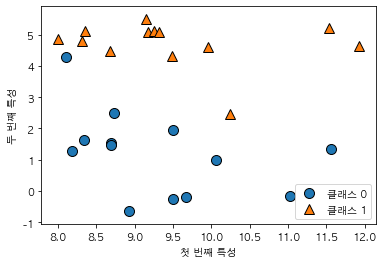

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape : ", X.shape)

Text(0, 0.5, '타깃')

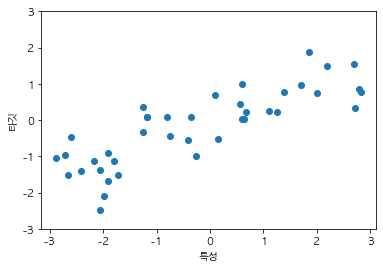

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

* x 축을 특성, y 축을 타깃으로 한 wave 데이터셋의 그래프

In [4]:
# 위 데이터셋 외에 scikit-learn에 들어 있는 실제 데이터셋 2개를 더 사용할 것이다.
# 하나는 유방암 종양의 임상 데이터를 기록해놓은 위스콘신 유방암(Wisconsin Breast Cancer) 데이터셋이다.
# 각 종양은 양성(bening)과 악성(malignant) 레이블로 되어 있다.
# 조직 데이터를 기반으로 종양이 악성인지 예측할 수 있도록 학습하는 것이 과제이다.
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys() : \n", cancer.keys())

cancer.keys() : 
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print("유방암 데이터의 형태", cancer.data.shape)

유방암 데이터의 형태 (569, 30)


In [6]:
print("클래스별 샘플 개수 : \n",
      {
          n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))
      }
 )

클래스별 샘플 개수 : 
 {'malignant': 212, 'benign': 357}


In [7]:
print("특성 이름:\n", cancer.feature_names)

특성 이름:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
# 또 하나의 데이터셋은 회귀분석용 보스턴 주택가격(Boston Housing) 데이터셋을 사용한다.
# 1970년대 보스턴 주변의 주택 평균 가격을 예측하는 것이다.
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태 : ", boston.data.shape)

데이터의 형태 :  (506, 13)


In [9]:
# 이 데이터는 feature engineering를 통해 얻은 데이터이다.
# feature engineering에 대해서는 4장에서 자세하게 다룰 예정이다.
X, y = mglearn.datasets.load_extended_boston()
print("X.shape : ", X.shape)

X.shape :  (506, 104)


## 2.3.2 k-최근접 이웃 (K-NN, k-nearest Neighbors)

### 2.3.2.1 K-NN 분류

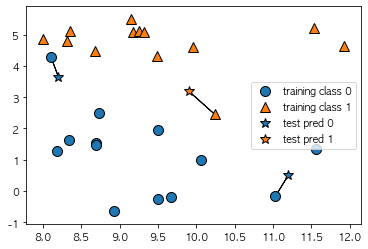

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

* forge 데이터셋에 대한 1-neighobrs 모델 예측

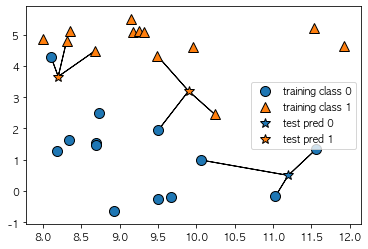

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

* forge 데이터셋에 대한 3-neighobrs 모델 예측

In [12]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

* scikit-learn을 사용해서 K-NN 알고리즘을 어떻게 적용하는지 살펴보려고 한다.
* 먼저 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눈다

In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

* KNeighborsClassifier를 import 후 객체를 생성
* neighbors를 3으로 지정

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

* 훈련셋트를 사용하여 분류 모델을 학습한다.

In [15]:
print("테스트 세트 예측 : ", clf.predict(X_test))

테스트 세트 예측 :  [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도 : {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도 : 0.86


* 모델의 정확도는 86% 이다.
* 즉, 모델이 테스트 데이터셋에 있는 샘플 중 86%를 정확히 예측하였다.

### 2.3.2.2 KNeighborsClassifier 분석
* 2차원 데이터셋이므로 가능한 모든 테스트 포인트의 예측을 xy평면에 그려볼 수 있다.
* 이렇게 하면 알고리즘이 클래스 0과 1로 지정한 영역으로 나뉘는 결정경계(decision boundary)를 볼 수 있다.

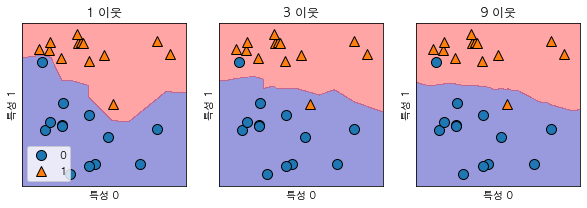

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴한다.
    # 그래서 객체 생성과 메소드를 한 줄에 쓸 수 있다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

* neighbors이 늘어날수록 decision boundary가 부드러워지는 것을 볼 수 있다. 이것은 모델이 단순해지고 있다는 것을 암시한다.

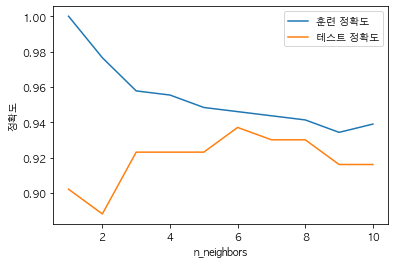

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

training_accuracy = []
test_accuracy = []
# 1에서 10 까지 n_neighbors를 적용
neighbors_settings  = range(1, 11)

for n_neighbors in neighbors_settings:
    #모델 생성
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    #훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    #일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

* 유방암 데이터셋을 사용하여 모델의 복잡도와 일반화 사이의 관계를 입증
* 정확도가 가장 좋을 때는 6개의 neighbors를 사용할때 이다.

### 2.3.2.3 K-최근접 이웃 회귀

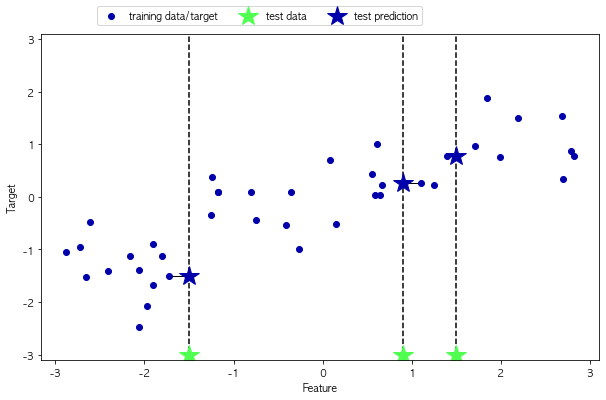

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

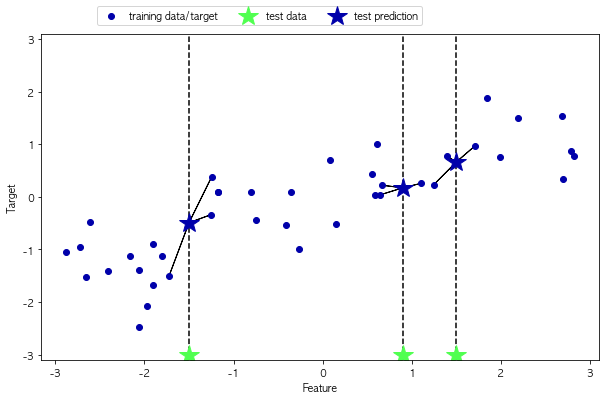

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

In [22]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # wave 데이터셋을 훈련 세트와 테스트 세트로 나눈다.
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("테스트 세트 예측 : \n", reg.predict(X_test))
print('------------------------------------------')
print("테스트 세트 R^2 : {:.2f}". format(reg.score(X_test, y_test)))

테스트 세트 예측 : 
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
------------------------------------------
테스트 세트 R^2 : 0.83


* score 메서드는 회귀일땐 R^2(결정계수) 값을 반환한다.

### 2.3.2.4 KNeighborsRegressor 분석

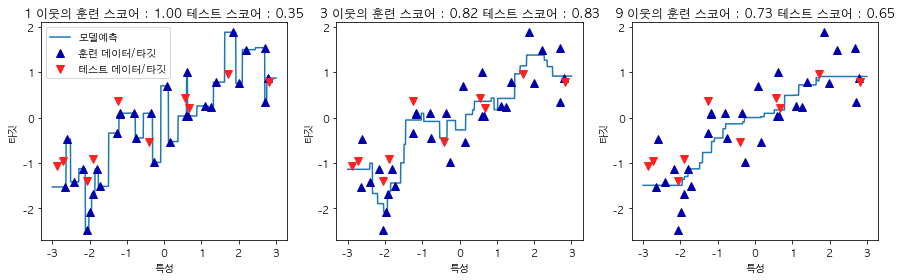

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1) # -3과 3사이에 1,000개의 데이터 포인트를 만든다.

for n_neighbors, ax in zip([1,3,9], axes) : #1, 3, 9 neighbors를 사용해서 예측
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어 : {:.2f} 테스트 스코어 : {:.2f}". format(
            n_neighbors,
            reg.score(X_train, y_train),
            reg.score(X_test, y_test)
        )
    )
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(
    ["모델예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best"
)


* 가능한 모든 특성 값을 만들어 주는 예측
* neighbors=1 일때는 모든 훈련 데이터를 거쳐가면서 구분함. 이럴 경우 매우 불완전한 예측을 할 수 있음.
* neighbors=9 일때는 테스트 스코어가 낮지만 안정된 예측을 할 수 있음. 

### 2.3.2.5 장단점과 매개변수

**일반적으로 KNeighbors 분류기에 중요한 매개변수는 두개이다.**<BR>
@ 데이터 포인트 사이의 거리를 재는 방법<BR>
@ 이웃 수<BR>
<BR>
**K-NN의 장점**<BR>
@ 이해하기 매운 쉬운 모델<BR>
@ 많이 조정하지 않아도 자주 좋은 성능을 냄, 그래서 더 복잡한 알고리즘 사용전에 시도해볼 수 있는 좋은 시작점.<BR><BR>
**K-NN의 단점**<BR>
@ 예측이 느림<BR>
@ 많은 특성을 처리하는 능력이 부족<BR>
<BR>
단점을 극복하기 위해 나온것이 선형 모델(linear Model) 이다.

## 2.3.3 선형 모델(Linear Model)

### 2.3.3.1 회귀 선형 모델

w[0]: 0.393906  b: -0.031804


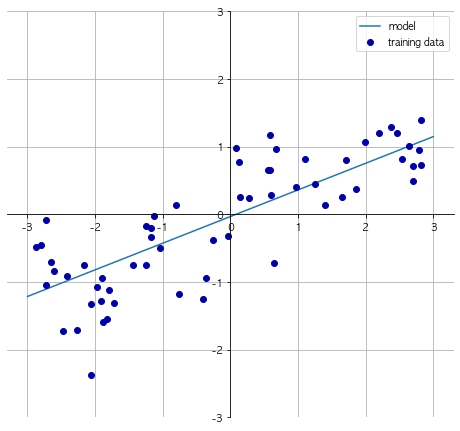

In [25]:
mglearn.plots.plot_linear_regression_wave()

* wave 데이터셋에 대한 선형 모델의 예측

### 2.3.3.2 선형 회귀(최소제곱법)
* 선형 회귀(linear regression) 또는 최소제곱법(OLS, ordinary least squares)는 가장 간단하고 오래된 회귀용 선형 알고리즘이다.
* 선형 회귀는 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차(mean squared error)를 최소화하는 파라미터 w(기울기), b(절편)를 찾는다.
* 선형회귀는 매개변수가 없는 것이 장점이다. 그렇지만 모델의 복잡도를 제어할 방법도 없다.

In [26]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [27]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


* 기울기 파라미터(w)는 weight 또는 coefficient 이라고 하며, codf_ 속성에 저장되어 있다.
* offset 또는 intercept 파라미터(b)는 intercept_ 속성에 저장되어있다.

In [28]:
print("훈련 세트 점수 : {:.2f}". format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}". format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.67
테스트 세트 점수 : 0.66


* R^2(결정계수) 값이 0.66 은 좋은 결과는 아니다. 하지만 훈련 세트와 테스트 세트의 점수가 매우 비슷한 것을 알 수 있다.
* 이는 과대적합이 아니라 과소적합인 상태를 의미한다.

In [29]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [30]:
print("훈련 세트 점수 : {:.2f}". format(lr.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}". format(lr.score(X_test, y_test)))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.61


* boston 데이터를 사용해서 선형 모델을 적용한 결과이다.
* 훈련 세트와 테스트 세트의 R^2(결정계수)점수 차이가 많이 난다. 이것은 과대적합되었다는 확실한 신호이다.

### 2.3.3.3 Ridge 회귀
@ 선형모델이므로 최소적합법에서 사용한 것과 같은 예측 함수를 사용한다.<BR>
@ 가중지(w) 선택은 훈련 데이터를 잘 예측하기 위해서 뿐만 아니라 추가 제약 조건을 만족시키기 위한 목적도 있다.<BR>
@ 가중치의 절대값을 가능한 작게 만든다. 즉, w의 모든 원소가 0에 가갑게 되길 원한다.(기울기를 작게)<BR>
@ 이런 제약을 규제(regularization)라고 한다. 규제란 과대적합이 되지 않도록 모델을 강제로 제한한다는 의미이다.<BR>
@ Ridge 회귀에서 사용하는 규제 방식을 L2 규제라고 한다.<BR>

In [31]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}". format(ridge.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}". format(ridge.score(X_test, y_test)))

훈련 세트 점수 : 0.89
테스트 세트 점수 : 0.75


* 훈련 세트 점수는 LinearRegression 보다 낮지만 테스트 점수는 높은것을 볼 수 있다.
* 선형회귀는 과대적합이 되지만 Ridge는 덜 자유로운 모델이기 때문에 과대적합이 적어진다.

In [32]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}". format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}". format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


* alpha 값을 이용하여 모델을 얼마나 단순화할지 정할 수 있다. (일반화에 도움이 될 수 있음)

In [33]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}". format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}". format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


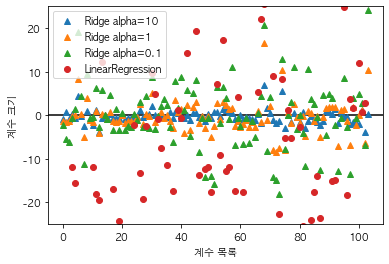

In [34]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, '^', label="Ridge alpha=1")
plt.plot(ridge01.coef_, '^', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

* alpha 값에 따라 모델의 coef_ 속성이 어떻게 달라지는지 볼 수 있다.
* coef_ 값을 조사해보면 alpha 매개변수가 모델을 어떻게 변경시키는지 더 깊게 이해할 수 있다.
* 높은 alpha 값은 제약이 더 많은 모델이므로 작은 alpha 값일 때보다 coef_ 의 절대값 크기가 작을 것이라고 예상할 수 있다.
* **alpha가 낮을수록 아무런 규제가 없어 계수크기가 0으로부터 멀어지는 것을 알 수 있다.**

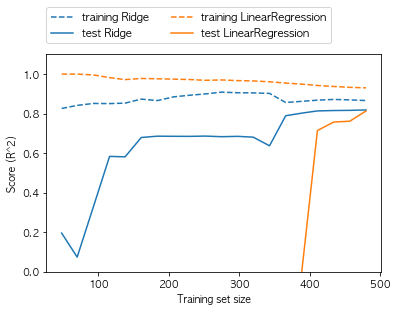

In [35]:
mglearn.plots.plot_ridge_n_samples()

* **규제의 효과를 이해하는 또 다른 방법은 alpha 값을 고정하고 훈련 데이터의 크기를 변화시켜 보는 것이다.**
* 위 이미지는 데이터 셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프 이다. <- **학습 곡선(learning curve) 라고 한다.**

### 2.3.3.4 Lasso 회귀
@ Ridge와 같이 Lasso도 계수를 0에 가깝게 만들려고 한다.<BR>
@ 하지만 규제 방식이 다르다. Lasso 는 L1 규제를 사용한다.<BR>
@ L1 규제의 결과로 라소를 사용할 때 어떤 계수는 정말 0이 된다. (즉, 완전히 제외되는 특성이 생긴다.)<BR>
@ 이러한 점은 feature selection가 자동으로 이뤄진다고 보면 된다.<BR>

In [36]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}". format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}". format(lasso.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso.coef_ != 0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 :  4


* 훈련 세으톼 테스트 세트 모두에서 결과가 좋지 않은것을 알 수 있다.
* 이는 과소적합이며 104개의 특성 중 4개만 사용한 것을 볼 수 있다.
* Ridge와 마찬가지로 alpha 매개변수를 사용해서 가중치를 조절할 수 있다.

In [37]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생함.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}". format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}". format(lasso001.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso001.coef_ != 0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 :  33


* alpha 값을 낮추면 모델의 복잡도는 증가하여 훈련/테스트 세트에서 성능이 좋아진다.
* Ridge보다 조금 나은데 사용된 특성이 104개 중 33개뿐이어서 모델을 분석하기에 용이하다.

In [38]:
# "max_iter" 기본 값을 증가시키지 않으면 max_iter 값을 늘리라는 경고가 발생함.
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)

print("훈련 세트 점수 : {:.2f}". format(lasso00001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}". format(lasso00001.score(X_test, y_test)))
print("사용한 특성의 개수 : ", np.sum(lasso00001.coef_ != 0))

훈련 세트 점수 : 0.95
테스트 세트 점수 : 0.64
사용한 특성의 개수 :  96


* alpha 값을 너무 낮추면 규제의 효과가 없어져서 LinearRegression의 결과와 비슷해진다.

Text(0, 0.5, '계수 크기')

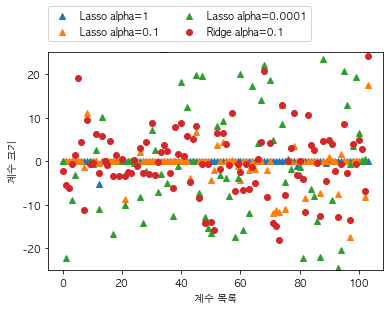

In [39]:
plt.plot(lasso.coef_, '^', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.1")
plt.plot(lasso00001.coef_, '^', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")

* scikit-learn은 Lasso와 Ridge의 페널티를 결합한 ElasticNet도 제공한다. 이 조합은 최상의 성능을 내지만 L1 규제와 L2 규제를 위한 매개변수 두 개를 조정해야 한다.

### 2.3.4 분류용 선형 모델

#### 2.3.4.1 binary classfication(이진분류)
@ 특성들의 가중치 합을 그냥 사용하는 대신 예측한 값을 임계치 0과 비교하여 0보다 크면 -1 작으면 +1으로 예측<BR>
@ 가장 널리 알려진 두 개의 선형 분류 알고리즘은 logistic regression과 support vector machine가 있다.

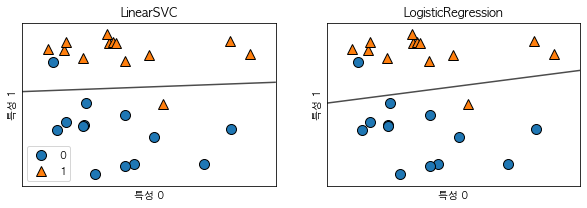

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes) :
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(
        clf, X, fill=False, eps=0.5, ax=ax, alpha=.7
    )
    mglearn.discrete_scatter(
        X[:, 0], X[:, 1], y, ax=ax
    )
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend()

* 두 모델은 비슷한 결정경계를 만든것을 알 수 있다. 그리고 똑같이 포인트 두 개를 잘못 분류하였다.
* 두 모델은 기본적으로 L2 규제를 사용한다.
* 규제의 강도를 결정하는 매개변수는 C 값이다. C의 값이 높아지면 규제가 감소한다.
* C값은 높을수록 훈련 세트에 최대로 맞추려고 한다. 반대로 C 값을 낮추면 모델은 계수 벡터(w)가 0에 가까워지도록 만든다.
* 다른 설명으로는 C의 값이 낮아지면 데이터 포인트 중 다수에 맞추려고 하는 반면, C의 값을 높이면 개개의 데이터 포인트를 정확히 분류할려고 노력할 것이다.

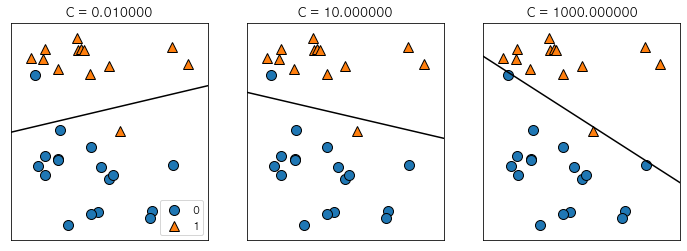

In [41]:
mglearn.plots.plot_linear_svc_regularization()

* forge 데이터셋에 각기 다른 C 값으로 만든 선형 SVM 모델의 결정 경계 이다.

In [42]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42
)

In [43]:
logreg = LogisticRegression().fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}". format(logreg.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}". format(logreg.score(X_test, y_test)))

훈련 세트 점수 : 0.955
테스트 세트 점수 : 0.958


* 훈련 세트와 테스트 세트의 성능이 매우 비슷하므로 과소적합인 것 같다.

In [44]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}". format(logreg100.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}". format(logreg100.score(X_test, y_test)))

훈련 세트 점수 : 0.967
테스트 세트 점수 : 0.965


* C=100 사용하니 C=1 보다 더 좋은 점수를 내는 것을 알 수 있다.
* 이는 복잡도가 높은 모델일수록 성능이 좋은것을 알 수 있다.

In [45]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("훈련 세트 점수 : {:.3f}". format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}". format(logreg001.score(X_test, y_test)))

훈련 세트 점수 : 0.934
테스트 세트 점수 : 0.930


* C=0.01을 적용하니 점수가 내려가는 것을 알 수 있다.

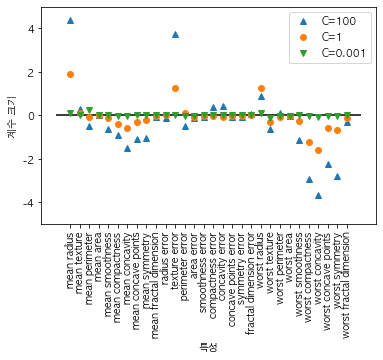

In [46]:
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.ylim(-5, 5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

* LogisticRegression은 기본으로 **L2 규제를 사용**하므로 Ridge와 비슷한 형태를 띈다.
* 규제를 강하게 할 수록 계수들은 0에 가까워지지만 완전히 0이 되지 않는다.


* 그래프를 통해 세 번째 계수(mean perimeter)에서 재미있는 현상을 확인할 수 있다.
* 세 번째 계수(mean perimeter)가 C=100, C=1 일때 이 계수는 음수이지만, C=0.001일 때는 양수가 되며 C=1 일 때보다 절대값이 더 크다.
* 이와 같은 모델을 해석하면 계수가 클래스와 특성의 연관성을 알려줄 수 있다.
* 예를 들어, "texture error" 특성은 악성인 샘플과 관련이 깊다. 그러나 "mean perimeter" 계수의 부호가 바뀌는 것으로 보아 높은 "mean perimeter" 값은 양성이나 악성의 신호 모두가 될 수 있다.

C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.91
C=0.001 인 l1 로지스틱 회귀의 훈련 정확도 : 0.92
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=1.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.96
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.99
C=100.000 인 l1 로지스틱 회귀의 훈련 정확도 : 0.98


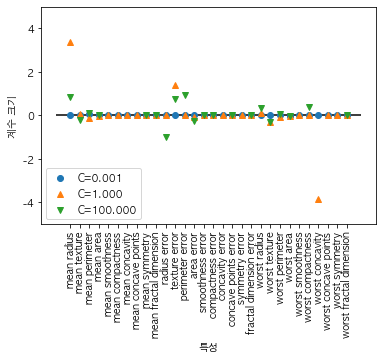

In [47]:
for C, marker in zip([0.001, 1, 100], ['o','^','v']) :
    lr_l1 = LogisticRegression(
        C = C,
        penalty="l1"
    ).fit(X_train, y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 훈련 정확도 : {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(
        lr_l1.coef_.T, 
        marker, 
        label="C={:.3f}".format(C)
    )
    
plt.xticks(
    range(cancer.data.shape[1]),
    cancer.feature_names,
    rotation=90
)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)

* penalty 매개변수를 이용하여 규제를 설정할 수 있다.

### 2.3.5 다중 클래스(multiclass) 분류용 선형 모델
@ 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 확장하는 보편적인 기법은 **일대다 방법** 이다.<BR>
@ 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다.(클래스의 수 만큼 이진 분류 모델이 만들어 진다.)<BR>

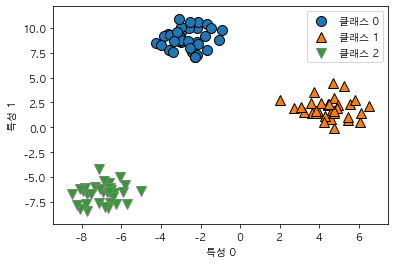

In [52]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0","클래스 1","클래스 2"])

* 세 개의 클래스를 가진 간단한 데이터셋에 일대다 방식 적용
* 이 데이터셋은 2차원이며 정규분포를 따른다.

In [54]:
linear_svm = LinearSVC().fit(X, y)
print("계수 배열의 크기 : ", linear_svm.coef_.shape) # 세 개의 클래스에 각각 대응하는 계수 벡터를 담고 있음.
print("절편 배열의 크기 : ", linear_svm.intercept_.shape) # 각 특성에 따른 계수 값

계수 배열의 크기 :  (3, 2)
절편 배열의 크기 :  (3,)


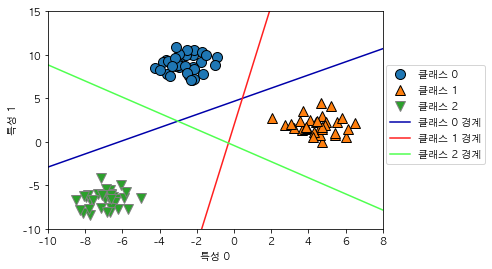

In [58]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend([
    "클래스 0",
    "클래스 1",
    "클래스 2",
    "클래스 0 경계",
    "클래스 1 경계",
    "클래스 2 경계",
], loc=(1.01, 0.3))

* 세 개의 이진 분류기가 만드는 경계를 시각화.

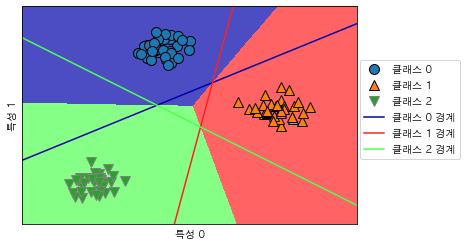

In [60]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(
    X[:, 0],
    X[:, 1],
    y
)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors) :
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c = color)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend([
    "클래스 0",
    "클래스 1",
    "클래스 2",
    "클래스 0 경계",
    "클래스 1 경계",
    "클래스 2 경계",
], loc=(1.01, 0.3))

* 세 개의 일대다 분류기가 만든 다중 클래스 결정 경계